In [73]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd  
import scipy
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris, load_digits, fetch_mldata, fetch_openml
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
%matplotlib inline
rcParams['figure.figsize'] = 12, 10

# Tip: if you want the generated figure to be large, re-run this cell before the beginning of every exercise.

# 2. Logistic Regression

---------------------------------------

## a. Logistic Regression

------------------

### LogisticRegression(penalty="l2", tol = 1e-4,C=1, solver = "liblinear", multi_class="ovr", l1_ratio=None)
*  Return a Logistic Regression object.
 
* #### Parameters
 1.    penalty: specify the type of norm for regularization
     * "l1" : L1-norm
     * "l2" : L2-norm
     * "elasticnet": elastic regularization
 2.    tol: tolerance for stopping criteria, type float
 3.  C : a positive float; smaller values specify stronger regularization
 4.    solver: algorithm used in the optimization problem
     * "newton-cg"
     * "lbfgs"
     * "liblinear"
     * "sag"
     * "saga"
 5.    multi_class: a string
     * "ovr" : binary classification
     * "multinomial": multinomial loss over a probability distribution, not available when solver='liblinear'
 6.    l1_ratio: only applicable when penalty="elasticnet". ratio of l1-regularization. 0 <= l1_ratio <= 1.
       if l1_ratio = 1 : equivalent to penalty="l1", if l1_ratio = 1 : equivalent to penalty="l2".
     
*  #### Attributes (of the LogisticRegression object):
 *    classses_: a list of class labels known to the classifier.
 *    coef_: coefficient of the features in the decision function.
 *    intercept_: intercept (bas) added to the decision function.
 
 
*  #### Methods (on the LogisticRegression object)
 *    fit(X, y) : fit the model on the training data.
 *    get_params: return the parameters for the linear regression estimator.
 *    predict(X): predict using the linear model
 *    set_params(): set the parameters of this estimator
 *    score(X, y): return the mean accuracy on the given test data and labels y.
 *    predict_proba(X): probability estimates
 *    sparsity() : convert coefficient matrix to sparse format.

In [74]:
# Example: Simple multinomial classification on Iris dataset

# Load the dataset
X, y = load_iris(return_X_y=True)

# Define the LogisticRegression object. Note that this is multinomial problem, so we cannot use the default solver.
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=1e5)

# Train the Logistic Regression model on the data
clf.fit(X,y)

# Predict the label of the first 3 samples
print(" Prediction for the first 3 samples: ", clf.predict(X[:3,:]))

# Print the predicted probabilities
print(" Predicted probabilities for the first 3 samples: ", clf.predict_proba(X[:3, :]))

# Print the average accuracy:
print("Accuracy of the model: ", clf.score(X,y))

 Prediction for the first 3 samples:  [0 0 0]
 Predicted probabilities for the first 3 samples:  [[9.81584563e-01 1.84154230e-02 1.45015560e-08]
 [9.71337814e-01 2.86621561e-02 3.01918305e-08]
 [9.85273250e-01 1.47267380e-02 1.23412629e-08]]
Accuracy of the model:  0.9733333333333334


Image Data Shape (1797, 64)
Label Data Shape (1797,)


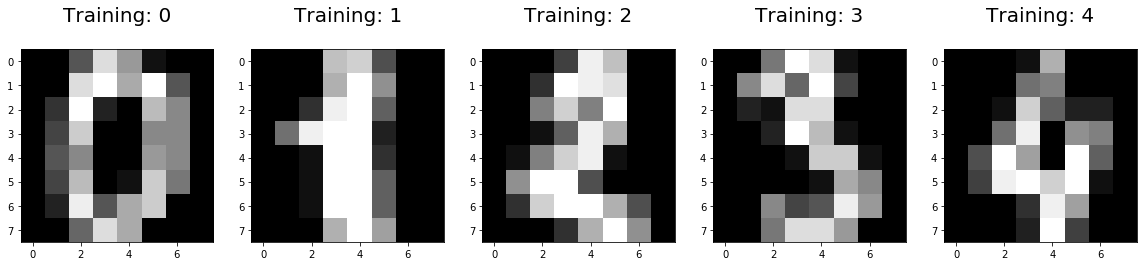

In [75]:
# Exercise 1: Logistic Regression on Digits
# Load the data
digits = load_digits()

# Explore the data
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [76]:
# Exercise 1: Logistic Regression on Digits (cont)

# Split the train-test sets (will see this function shortly)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Logistic Regression
### YOUR CODE HERE. Fill in the "None"
# Hint: define a simple Logistic Regression object with 'lbfgs' solver, 'multinomial' option, AND maximum 10000 iterations
logisticRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
# Hint: train the model on the training set
logisticRegr.fit(x_train, y_train)
# Hint: 'pred' is the predictions on the test set
pred = logisticRegr.predict(x_test)
# Hint: 'score' is the accuracy
score = logisticRegr.score(x_test, y_test)
### END OF YOUR CODE.

print("Accuracy is: ", score)

Accuracy is:  0.9533333333333334


In [77]:
# Exercise 2: Logistic Regression on MNIST dataset

# Load the data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Some insights into the dataset
print("Image Data Shape ", X.shape)
print("Label Data Shape ", y.shape)

Image Data Shape  (70000, 784)
Label Data Shape  (70000,)


In [78]:
# Exercise 2: Logistic Regression on MNIST dataset (cont)

# split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000, test_size=10000)

# Standardization of the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with L1-regularization
### YOUR CODE HERE. Fill in the "None".
# Hint: define a Logistic Regression object, for multiclass, L1-norm regularization, solver saga, tolerance 0.1 to speed up convergence
clf = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', tol=0.1)
# Hint: fit the model on training data.
clf.fit(X_train, y_train)
# Hint: 'accuracy' is the accuracy of the model on the test set.
l1_score = clf.score(X_test, y_test)
### END OF YOR CODE.

# Logistic Regression with L2-regularization
### YOUR CODE HERE. Fill in the "None". 3 lines of code.
# Hint: the parameters should be similar to the object defined above.
clf2 = LogisticRegression(multi_class='multinomial', penalty='l2', solver='saga', tol=0.1)
clf2.fit(X_train, y_train)
l2_score = clf2.score(X_test, y_test)
### END OF YOUR CODE.


print("Test score with L1 penalty: %.4f" % l1_score)
print("Test score with L2 penalty: %.4f" % l2_score)


Test score with L1 penalty: 0.8730
Test score with L2 penalty: 0.8750


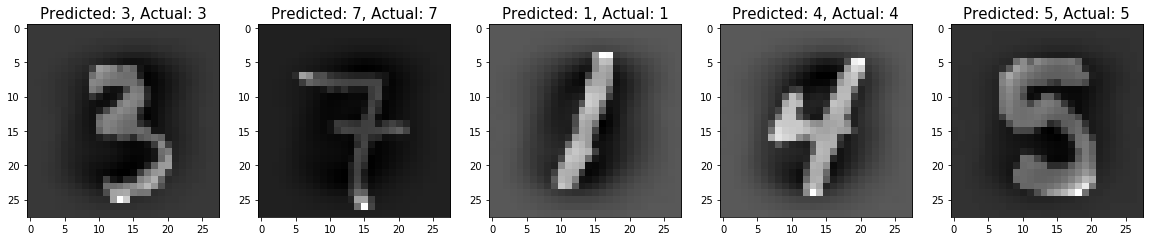

In [79]:
# Exercise 2: Logistic Regression on MNIST dataset (cont)
# Show some images with their predicted vs. real labels

### YOUR CODE HERE. Fill in the 'None'.
# Hint: 'predictions' should contain labels predicted for the test images. Either L1-regularized or L2-regularized model is fine.
predictions = clf.predict(X_test)
### END OF YOUR CODE.

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
        index +=1
        
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

We know that L1-regularization encourages sparsity (many learned coefficients are zero). Let us investigate if it is such the case of Logistic Regression!

C=1.00
Sparsity with L1 penalty:                6.25%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                32.81%
Sparsity with Elastic-Net penalty:       14.06%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


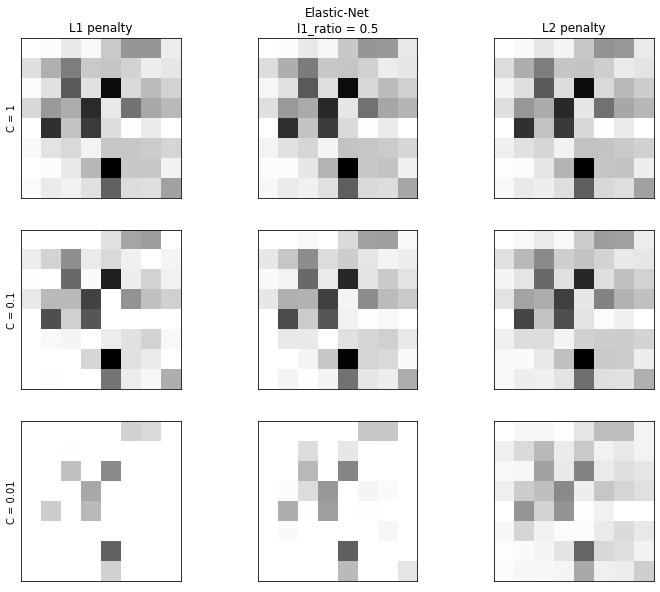

In [80]:
# Exercise 3: Regularization norms and Sparsity in Logistic Regression

# Load the dataset
digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    
    ### YOUR CODE HERE. Fill in the "None".
    
    # Hint: define 3 Logistic Regression objects, with 3 different regularization methods, tolerance 0.01, solver sage, C is C.
    # Hint: you may freely choose the ratio of L1-regularization in elasticnet.
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',l1_ratio=l1_ratio, tol=0.01)
    
    # Hint: train the model on the data 
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)
    
    # Hint: apply method ravel() to the trained coefficients.
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()
    
    ### END OF YOUR CODE.

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",
                                  sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:",
                                 clf_l1_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:",
                                 clf_en_LR.score(X, y)))
    print("{:<40} {:.2f}".format("Score with L2 penalty:",
                                 clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(np.abs(coefs.reshape(8, 8)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel('C = %s' % C)

plt.show()

Observe the sparsity percentage and compare between different types of regularization!

# 2. Logistic Regression

---------------------------------------

## b. Linear classifier with Stochastic Gradient Descent training

------------------

### SGDClassificer(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=1e-3)
*  Return a linear classifier (SVM, Logistic regression,...) with Stochastic Gradient Descent training.
 
* #### Parameters
 1.    loss: a string specifying the loss function to use
     * "hinge": model becomes a linear Support Vector Machine
     * "perceptron": model becomes Perceptron Algorithm
     * "squared_loss": linear regression loss.
     * "log": logistic regression.
 2.    penalty: specify the type of norm for regularization
     * "l1" : L1-norm
     * "l2" : L2-norm
     * "elasticnet" elasticnet regularization
 3.    alpha: float, weight of the regularization term
 4.    l1_ratio: appliable to penalty="elasticnet", ratio of L1-regularization; 1 if only L1 used, 0 if only L2 used
 5.    fit_intercept: whether to use intercept. if 'False': data assumed to be already centered.
 6.    max_iter: maximum number of iterations
 7.    tol: tolerance for stopping criteria, type float
     
 
*  #### Attributes (of the SGDClassifier object):
 *    coef_: estimated coefficients for the linear regression problem.
 *    intercept_: array of indepentdent term in the linear model.
 
*  #### Methods (on the SGDClassifier object)
 *    partial_fit(X, y, classes): perform one epoch of stochastic gradient descent on given samples. 'classes' is array of classes.
 *    fit(X, y) : fit the model on the training data
 *    get_params: return the parameters for the linear regression estimator.
 *    predict(X): predict using the linear model
 *    score(): mean accuracy on the given test data and labels

In [81]:
# Example :
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])  # np.ndarray (4L, 2L)
y = np.array([1, 1, 2, 2])  # np.ndarray (4L,)

# SGD CLassifier
# Define a Logistic Regression model, L2-norm regularization, regularization weight 0.0001
clf_1 = SGDClassifier(alpha=.0001, loss='log', penalty='l2')

# Fit the model on the training set
clf_1.fit(X, y)

print ("Prediction is: ", clf_1.predict([[-0.8, -1]]))

Prediction is:  [1]


In [82]:
# Exercise 1: Simple Logistic Regression with SGDClassifier()

np.random.seed(1234)
nsamples = 100
nfeatures = 1000
numOnesInX = np.int(0.01 * nsamples * nfeatures)  # 1000  # <type 'int'>
nlabels = 4
row_array = np.random.randint(0, nsamples, size=numOnesInX)
col_array = np.random.randint(0, nsamples, size=numOnesInX)
data = np.ones_like(row_array)

# Data
X = scipy.sparse.csc_matrix((data, (row_array, col_array)),shape=(nsamples, nfeatures))
y = np.random.randint(0, 2, size=[nsamples, nlabels])

# Logistic Regression
### YOUR CODE HERE. Fill in the "None".
# Hint: define Logistic Regression with SGDClassifier, regularization weight 0.0001, l2-regularization.
clf_2 = SGDClassifier(alpha=.0001, loss='log', penalty='l2')
# Hint: perform one epoch of SGD on the first 100 samples of data. Only consider 2 clases.
clf_2.partial_fit(X[:100, :], y[:100, 0], classes= [0,1])
# Hint: 'pred' is the predicted values on the first 10 samples.
pred = clf_2.predict(X[:10, :])
### END OF YOUR CODE.

# Print the accuracy score.
print ("Prediction is: ", pred)  # [1 1 0 0 1 1 0 0 1 1])
print ("Accuracy Score is: ", accuracy_score(pred, y[:10, 0]))  # gives 0.9)

Prediction is:  [0 1 0 0 1 1 0 0 1 1]
Accuracy Score is:  1.0


In [83]:
# Exercise 2: Different losses applied to SGDClassifier()

# Load dataset
df = pd.read_csv("dataset.csv")

# Some insights into the data
print(df.shape)
df.head()

(37776, 10)


,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [84]:
# Exercise 2: Different losses applied to SGDClassifier() (cont)

# Drop the columns that are not numerical data
df = df.drop(["date", "time", "username"], axis=1)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [85]:
# Exercise 2: Different losses applied to SGDClassifier() (cont)

# Pre-process the data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only

# Split the train/test sets, will see this function shortly.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# L2-regularized Linear Support Vector Machine
### YOUR CODE HERE. Fill in the "None"
# Hint: define a L2-regularized Support Vector Machine object by SGDClassifier()
model = SGDClassifier(loss="hinge", penalty="l2")
# Hint: fit the model on train set
model.fit(X_train, y_train)
# Hint: 'accuracy' is the accuracy of the model on the test set
accuracy = model.score(X_test, y_test)
### END OF YOUR CODE.

print(accuracy)

0.8697585768742059


Let us explore the accuracy as a function of the number of iterations!

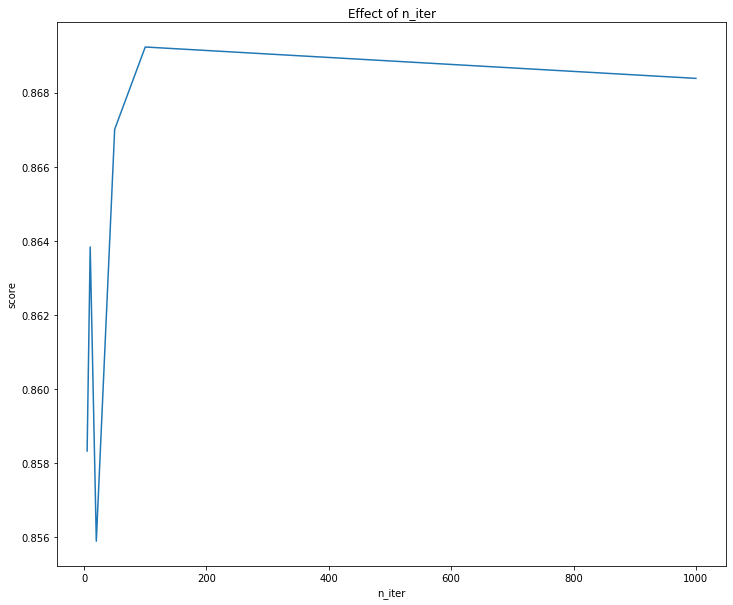

In [86]:
# Exercise 2: Different losses applied to SGDClassifier() (cont)

n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    for n_iter in n_iters:
        ### YOUR CODE HERE. Fill in the "None". 3 lines of code.
        # Note: at this step, I assume the students are familar with the steps: define object -->> fit -->> score
        # Hint: l2-regularized Support Vector Machine, number of iterations is n_iter
        # Hint: then fit the model on the train data, and append the accuracy on test data to 'scores'
        model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        ### END OF YOUR CODE.

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 
plt.show()

You may get different plots every time you run the cell. However, the general tendency is the accuracy improves as n_iter increases, and will converge at some point.

Let us also experiment on how accuracy changes if we apply different loss functions.

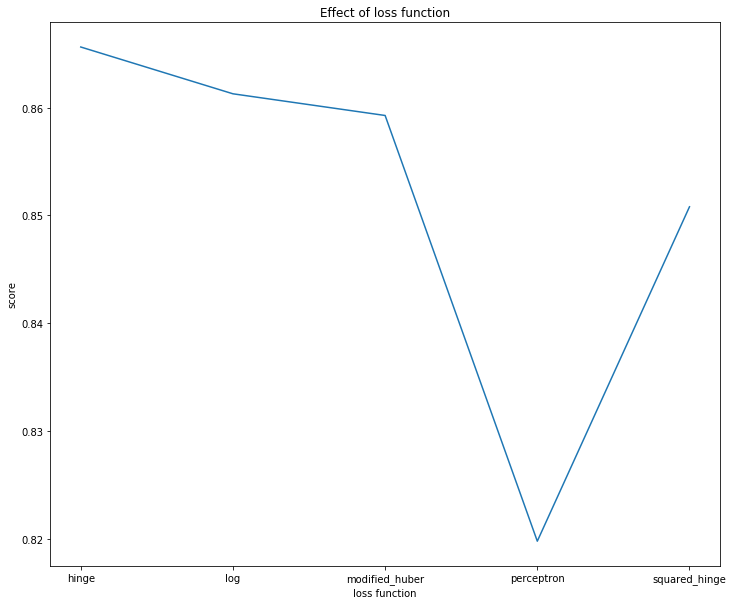

In [87]:
# Exercise 2: Different losses applied to SGDClassifier() (cont)
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    ### YOUR CODE HERE. Fill in the "None".
    # Hint: 1000 iterations, L2-regularization, try out all loss functions given in 'losses'.
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    ### END OF YOUR CODE.

plt.title("Effect of loss function")
plt.xlabel("loss function")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 
plt.show()

### References:
1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
2. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
3. https://github.com/WilliamQLiu/python-examples/blob/master/sklearn/SGDClassifier_example.py
4. https://www.kaggle.com/vmalyi/run-or-walk/downloads/dataset.csv/notebook

That is the end of Logistic Regression section for today tutorials! In the next part, we will see how some hyper-parameters can be chosen to optimize the performance!